In [13]:
import npc_lims
#get list of all sessions with ephys data
all_ephys_sessions = tuple(s for s in npc_lims.get_session_info(is_ephys=True))

import dynamicrouting_summary as dr
import pandas as pd
#Get dictionaries
dfs: dict[str, pd.DataFrame] = dr.get_dfs

In [14]:
dfs = dr.get_dfs()
dfs

LazyDict(keys=['session', 'subject', 'epochs', 'trials', 'performance', 'vis_rf_mapping', 'aud_rf_mapping', 'optotagging', 'invalid_times', 'devices', 'electrode_groups', 'electrodes'])

In [15]:
#Get number of subjects that went through ephys and were templeton mice

subject = dfs['subject']
subject
templetonsubjects = subject.query('is_templeton & is_ephys')
uniquesubjectstempleton = pd.unique(templetonsubjects['subject_id'])
len(uniquesubjectstempleton)

12

In [16]:
#Get number of subjects that went through ephys and were DR mice
dfs = dr.get_dfs()
subject = dfs['subject']
subject
drsubjects = subject.query('is_dynamic_routing & is_ephys')
uniquesubjectsdr = pd.unique(drsubjects['subject_id'])
len(uniquesubjectsdr)

18

In [5]:
#Find all genotypes of DR mice
subject = dfs['subject']
drsubjects = subject.query('is_dynamic_routing & is_ephys')
pd.unique(drsubjects['genotype'])


array(['wt/wt', 'VGAT-ChR2-YFP/wt',
       'Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
       'Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt',
       'Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt'], dtype=object)

In [22]:
#Distribution of genotypes DR mice

#VGAT DR mice 
drsubjects = subject.query('is_dynamic_routing & is_ephys')
drvgatmice = drsubjects.query('`genotype`.str.contains("VGAT")')
drvgatmice
numberofdrvgatmice = pd.unique(drvgatmice['subject_id'])

#SST DR mice
drsubjects = subject.query('is_dynamic_routing & is_ephys')
drsstmice = drsubjects.query('`genotype`.str.contains("Sst")')
drsstmice
numberofdrsstmice = pd.unique(drsstmice['subject_id'])

#Pvalb DR mice
drsubjects = subject.query('is_dynamic_routing & is_ephys')
drpvalbmice = drsubjects.query('`genotype`.str.contains("Pvalb")')
drpvalbmice
numberofdrpvalbmice = pd.unique(drpvalbmice['subject_id'])

#VIP DR mice
drsubjects = subject.query('is_dynamic_routing & is_ephys')
drvipmice = drsubjects.query('`genotype`.str.contains("Vip")')
drvipmice
numberofdrvipmice = pd.unique(drvipmice['subject_id'])

#wt/wt DR mice
drsubjects = subject.query('is_dynamic_routing & is_ephys')
drwtmice = drsubjects.query('`genotype`.str.contains("wt/wt")')
drwtmice
numberofdrwtmice = pd.unique(drwtmice['subject_id'])

dr_wt = len(numberofdrwtmice)
dr_vip = len(numberofdrvipmice)
dr_pvalb = len(numberofdrpvalbmice)
dr_sst = len(numberofdrsstmice)
dr_vgat = len(numberofdrvgatmice)



6

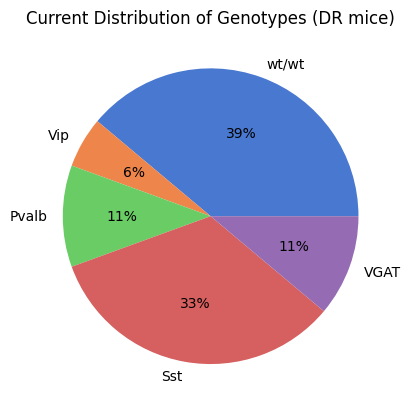

In [7]:
#Make a pie chart plotting number of DR mice with different genotypes
import matplotlib.pyplot as plt
import seaborn as sns

data = [dr_wt, dr_vip, dr_pvalb, dr_sst, dr_vgat]
keys = ['wt/wt', 'Vip', 'Pvalb', 'Sst','VGAT']

palette_color = sns.color_palette('muted')

plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title('Current Distribution of Genotypes (DR mice)')
plt.show()

In [8]:
#Find all genotypes of templeton mice
subject = dfs['subject']
templetonsubjects = subject.query('is_templeton & is_ephys')
pd.unique(templetonsubjects['genotype'])

array(['wt/wt', 'VGAT-ChR2-YFP/wt'], dtype=object)

In [12]:
#Distribution of genotypes Templeton mice

#VGAT Templeton mice 
templetonsubjects = subject.query('is_templeton & is_ephys')
tvgatmice = templetonsubjects.query('`genotype`.str.contains("VGAT")')
tvgatmice
numberoftvgatmice = pd.unique(tvgatmice['subject_id'])

#wt/wt Templeton mice
templetonsubjects = subject.query('is_templeton & is_ephys')
twtmice = templetonsubjects.query('`genotype`.str.contains("wt/wt")')
twtmice
numberoftwtmice = pd.unique(twtmice['subject_id'])

t_wt = len(numberoftwtmice)
t_vgat = len(numberoftvgatmice)


NameError: name 'subject' is not defined

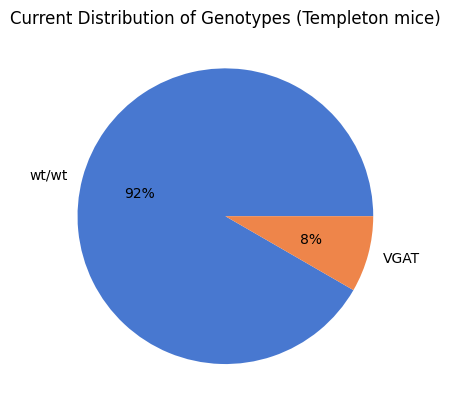

In [27]:
#Make a pie chart plotting number of Templeton mice with different genotypes
import matplotlib.pyplot as plt
import seaborn as sns

data = [t_wt, t_vgat]
keys = ['wt/wt', 'VGAT']

palette_color = sns.color_palette('muted')

plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title('Current Distribution of Genotypes (Templeton mice)')
plt.show()

In [11]:
#Find number of DR mice with tones
session = dfs['session']
session
drsession = session.query('is_dynamic_routing & is_ephys')
drtones = drsession.query('`stimulus_notes`.str.contains("tone")')
uniquedrtones = pd.unique(drtones['subject_id'])
len(uniquedrtones)

2

In [12]:
# Find number of Templeton mice with AMN
session = dfs['session']
session
templetonsession = session.query('is_templeton & is_ephys')
templetonsession.dropna(inplace=True)
templetonAMN = templetonsession.query('`stimulus_notes`.str.contains("AMN")')
uniquetempletonAMN = pd.unique(templetonAMN['subject_id'])
len(uniquetempletonAMN)

C:\Users\vayle.lafehr\AppData\Local\Temp\ipykernel_17024\2840636552.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  templetonsession.dropna(inplace=True)


2

In [13]:
#Find number of DR mice with AMN
session = dfs['session']
drsession = session.query('is_dynamic_routing & is_ephys')
drAMN = drsession.query('`stimulus_notes`.str.contains("AMN")')
uniquedrAMN = pd.unique(drAMN['subject_id'])
len(uniquedrAMN)


16

In [14]:
#Find number of Templeton mice with tones
session = dfs['session']
templetonsession = session.query('is_templeton & is_ephys')
templetonsession
templetonsession.dropna(inplace=True)
templetones = templetonsession.query('~`stimulus_notes`.str.contains("AMN")')
uniquetempletones = pd.unique(templetones['subject_id'])
len(uniquetempletones)


C:\Users\vayle.lafehr\AppData\Local\Temp\ipykernel_17024\2663172829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  templetonsession.dropna(inplace=True)


6

In [15]:
#Get number of vis type (moving) for DR mice
session = dfs['session']
session
drsession = session.query('is_dynamic_routing & is_ephys')
drmoving = drsession.query('`stimulus_notes`.str.contains("moving")')
uniquedrmoving = pd.unique(drmoving['subject_id'])
len(uniquedrmoving)

16

In [16]:
#Get number of vis type (static) for DR mice
session = dfs['session']
session
drsession = session.query('is_dynamic_routing & is_ephys')
drstatic = drsession.query('~`stimulus_notes`.str.contains("moving")')
uniquedrstatic = pd.unique(drstatic['subject_id'])
len(uniquedrstatic)

2

In [23]:
#Get number of vis type (moving) for Templeton mice
session = dfs['session']
session
templetonsession = session.query('is_templeton & is_ephys')
templetonsession.dropna(inplace=True)
templetonmoving = templetonsession.query('`stimulus_notes`.str.contains("DG")')
uniquetempletonmoving = pd.unique(templetonmoving['subject_id'])
len(uniquetempletonmoving)

C:\Users\vayle.lafehr\AppData\Local\Temp\ipykernel_8808\4193660115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  templetonsession.dropna(inplace=True)


3

In [24]:
#Get number of vis type (static) for Templeton mice
session = dfs['session']
session
templetonsession = session.query('is_templeton & is_ephys')
templetonsession.dropna(inplace=True)
templetonstatic = templetonsession.query('~`stimulus_notes`.str.contains("DG")')
uniquetempletonstatic = pd.unique(templetonstatic['subject_id'])
len(uniquetempletonstatic)

C:\Users\vayle.lafehr\AppData\Local\Temp\ipykernel_8808\1176660196.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  templetonsession.dropna(inplace=True)


9

In [10]:
#Get info about ephys sessions with issues/weird data
ephys_sessions_with_issues = [s for s in npc_lims.get_session_info(is_ephys=True) if s.issues]
ephys_sessions_with_issues
len(ephys_sessions_with_issues)

drissues = [x for x in ephys_sessions_with_issues if x.project=='DynamicRouting']
len(drissues)

9

In [11]:
templetonissues = [x for x in ephys_sessions_with_issues if x.project=='TempletonPilotSession']
len(templetonissues)

5